In [6]:
!pip install matplotlib psycopg2-binary

In [8]:
# Import all needed packages
import matplotlib.pyplot as plt
import psycopg2 # Used as an adapter to connect with Postgres Databases

In [10]:
# Start by connecting to the DB (Hard code credentials, could be switched to env for more safety later on)
connection = psycopg2.connect(
    host="localhost",
    port="5432",
    dbname="grocery-api",
    user="postgres",
    password="admin"
)

In [14]:
# Fetch the top 5 items
with connection.cursor() as cursor:
    cursor.execute("""
      SELECT name, COUNT(*) AS count
      FROM items
	    GROUP BY name
	    ORDER BY count DESC
	    LIMIT 5
    """)

    data = cursor.fetchall()

names, counts = zip(*data) # Zip the names and counts from the cursor data that we fetched

# Close the connection after getting the data we need
connection.close()

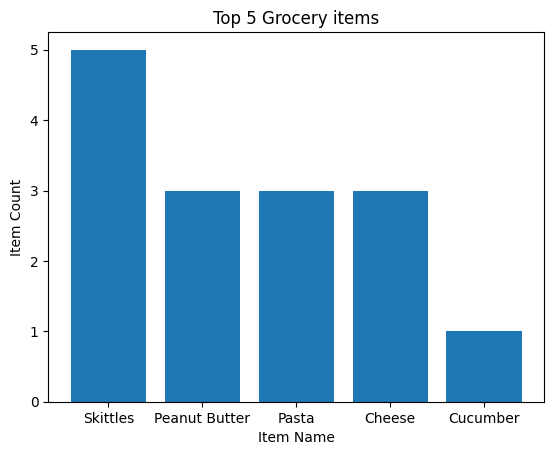

In [15]:
# Plot the data that we found
plt.bar(names, counts)
plt.title("Top 5 Grocery items")
plt.xlabel("Item Name")
plt.ylabel("Item Count")
plt.show()